In [317]:
import numpy as np 
import tensorflow as tf
import cv2 as cv                                  ## Gerekli Kütüphaneler
import matplotlib.pyplot as plt
import librosa
import pandas as pd

In [318]:
from  IPython.display import Audio as play  ## ses oynatmak için

In [319]:
#  import tarfile
              
# tar.gz uzantılı dosyayı okuma


# file = tarfile.open('UrbanSound8K.tar.gz')
  
# dosyayı ayıklama
# file.extractall()
  
# file.close() 

In [320]:
df = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')

In [321]:
df.head()  ## Ses dosyaları ve hakkında bilgiler içeren dataframe

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [322]:
df.columns

Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')

In [491]:
num2classes = {0 : "air_conditioner"
,1 : "car_horn"
,2 : "children_playing"
,3 : "dog_bark"
,4 : "drilling"
,5 : "engine_idling"
,6 : "gun_shot"
,7 : "jackhammer"
,8 : "siren"
,9 : "street_music"}

In [323]:
import os
import random

In [324]:
filePath = 'C:\\Users\\user\\Desktop\\BootCamp Project\\UrbanSound8K\\audio'

In [325]:
for dirpath, dirnames, filenames in os.walk(filePath):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

There are 10 directories and 1 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio'.
There are 0 directories and 874 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold1'.
There are 0 directories and 838 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold10'.
There are 0 directories and 889 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold2'.
There are 0 directories and 926 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold3'.
There are 0 directories and 991 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold4'.
There are 0 directories and 937 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold5'.
There are 0 directories and 824 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold6'.
There are 0 directories and 839 files in 'C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold7'.
There are 0 directories and 807 fi

In [326]:
## lets play some random audio and create spectogram to see from fold1

audioPath = 'C:\\Users\\user\\Desktop\\BootCamp Project\\UrbanSound8K\\audio\\fold1'
for filenames in os.listdir(audioPath):
      print(filenames)

.DS_Store
101415-3-0-2.wav
101415-3-0-3.wav
101415-3-0-8.wav
102106-3-0-0.wav
102305-6-0-0.wav
102842-3-0-1.wav
102842-3-1-0.wav
102842-3-1-5.wav
102842-3-1-6.wav
103074-7-0-0.wav
103074-7-0-1.wav
103074-7-0-2.wav
103074-7-1-0.wav
103074-7-1-1.wav
103074-7-1-2.wav
103074-7-1-3.wav
103074-7-1-4.wav
103074-7-1-5.wav
103074-7-1-6.wav
103074-7-2-0.wav
103074-7-3-0.wav
103074-7-3-1.wav
103074-7-3-2.wav
103074-7-3-3.wav
103074-7-4-0.wav
103074-7-4-1.wav
103074-7-4-2.wav
103074-7-4-3.wav
103074-7-4-4.wav
103074-7-4-5.wav
103074-7-4-6.wav
103258-5-0-0.wav
103258-5-0-1.wav
103258-5-0-10.wav
103258-5-0-11.wav
103258-5-0-12.wav
103258-5-0-13.wav
103258-5-0-14.wav
103258-5-0-15.wav
103258-5-0-16.wav
103258-5-0-17.wav
103258-5-0-18.wav
103258-5-0-19.wav
103258-5-0-2.wav
103258-5-0-3.wav
103258-5-0-4.wav
103258-5-0-5.wav
103258-5-0-6.wav
103258-5-0-7.wav
103258-5-0-8.wav
103258-5-0-9.wav
105415-2-0-1.wav
105415-2-0-15.wav
105415-2-0-19.wav
105415-2-0-21.wav
105415-2-0-24.wav
105415-2-0-4.wav
105415-

In [327]:
# spectogram yaratmak için gerekli fonksiyon

def create_spectogram(path):
    scale,sr = librosa.load(path)
    spec = librosa.feature.melspectrogram(y=scale,sr=sr,)
    spec_conv = librosa.amplitude_to_db(spec,ref=np.max,)
    spec_conv+=255
    return spec_conv

In [328]:
## rastgele bir ses dosyası seçme

filename = random.choice(os.listdir(audioPath))
path = os.path.join(audioPath, filename)
print("Class name is ",df[df["slice_file_name"]==path.split("\\")[-1]]["class"])
play(path)

Class name is  6829    drilling
Name: class, dtype: object


In [359]:
spect = create_spectogram(path)
spect

array([[194.2843 , 209.4044 , 211.89592, ..., 210.21196, 203.15054,
        202.47775],
       [196.03218, 205.57864, 201.19963, ..., 207.33087, 205.70532,
        202.51459],
       [202.90472, 202.25487, 195.2963 , ..., 211.23785, 205.47638,
        183.65077],
       ...,
       [194.96039, 199.09357, 198.68018, ..., 198.23708, 198.30847,
        195.72687],
       [175.     , 180.05371, 177.41666, ..., 182.09253, 179.43301,
        176.77655],
       [175.     , 175.     , 175.     , ..., 175.     , 175.     ,
        175.     ]], dtype=float32)

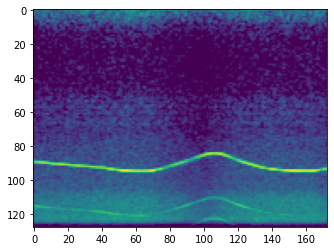

In [360]:
plt.imshow(spect)

##  Creating Spectograms for each audio file 

In [334]:
## creating folders for spectogram
base_dir = os.path.join('C:\\Users\\user\\Desktop\\BootCamp Project','spectograms')
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
for x in range(10):
    dir = os.path.join(base_dir,str(x))
    if not os.path.exists(dir):
        os.mkdir(dir)

In [ ]:
base_audioPath = 'C:\\Users\\user\\Desktop\\BootCamp Project\\UrbanSound8K\\audio'
for i in range(1,11):
    
    fold = "fold"+str(i)
    fold_path = os.path.join(base_audioPath,fold)
    print(fold_path)
    
    for filename in os.listdir(fold_path):
        if filename != ".DS_Store":
            
            audio_path = os.path.join(fold_path,filename)
            mel_spect = create_spectogram(audio_path)
        
            index = df[df["slice_file_name"]==audio_path.split("\\")[-1]]['classID']
      
            img_name = audio_path.split("\\")[-1].rstrip(".wav")+".jpg"
            img_path = os.path.join(base_dir,str(index.iloc[0]),img_name)
            cv.imwrite(filename=img_path,img=mel_spect)

C:\Users\user\Desktop\BootCamp Project\UrbanSound8K\audio\fold1


## Train,test and validation splits on spectograms (80,10,10)

In [336]:
import shutil
rootdir =os.path.join('C:\\Users\\user\\Desktop\\BootCamp Project','spectograms')

In [338]:
for i in range(10):

    os.makedirs(rootdir +'/train/' + str(i))

    os.makedirs(rootdir +'/test/' + str(i))
    
    os.makedirs(rootdir +'/valid/' + str(i))

    source = rootdir + '/' + str(i)

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.20
    valid_ratio= 0.50

    train_FileNames, temp_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])
    
    test_FileNames,valid_FileNames =  np.split(np.array(temp_FileNames),
                                                      [int(len(temp_FileNames)* (1 - valid_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]
    valid_FileNames = [source+'/' + name for name in valid_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, rootdir +'/train/' + str(i))

    for name in test_FileNames:
      shutil.copy(name, rootdir +'/test/' + str(i))
    
    for name in valid_FileNames:
      shutil.copy(name, rootdir +'/valid/' + str(i))

## Preparing Data Loaders

In [343]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1/255.
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1/255.

)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1/255.

)

train_dir = "C:\\Users\\user\\Desktop\\BootCamp Project\\spectograms\\train"
valid_dir = "C:\\Users\\user\\Desktop\\BootCamp Project\\spectograms\\valid"
test_dir = "C:\\Users\\user\\Desktop\\BootCamp Project\\spectograms\\test"

train_data=train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(128,128), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42,
                                               color_mode='grayscale')

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(128, 128),
                                               class_mode="categorical",
                                               seed=42,
                                               color_mode='grayscale')
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(128, 128),
                                               class_mode="categorical",
                                               seed=42,
                                               color_mode='grayscale')

Found 6985 images belonging to 10 classes.
Found 874 images belonging to 10 classes.
Found 873 images belonging to 10 classes.


In [347]:
imgs,labels = train_data.next()

Label is  3


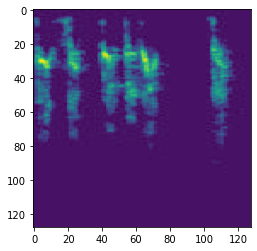

In [352]:
plt.imshow(imgs[0])
print("Label is ",np.argmax(labels[0])) ## class id 3 is dog_bark we can see it in dataframe

## Creating and Training The Classifier Model

In [353]:
model_1 = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(128,128,1)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
219/219 [==============================] - 69s 312ms/step - loss: 2.0520 - accuracy: 0.2482 - val_loss: 1.5157 - val_accuracy: 0.4783
Epoch 2/5
219/219 [==============================] - 47s 215ms/step - loss: 1.3875 - accuracy: 0.5339 - val_loss: 1.1814 - val_accuracy: 0.5904
Epoch 3/5
219/219 [==============================] - 45s 206ms/step - loss: 1.1361 - accuracy: 0.6241 - val_loss: 1.0780 - val_accuracy: 0.6568
Epoch 4/5
219/219 [==============================] - 45s 204ms/step - loss: 0.9639 - accuracy: 0.6799 - val_loss: 0.9865 - val_accuracy: 0.6876
Epoch 5/5
219/219 [==============================] - 45s 204ms/step - loss: 0.7994 - accuracy: 0.7363 - val_loss: 0.8861 - val_accuracy: 0.7243


## Evaluating Model Results

<AxesSubplot:>

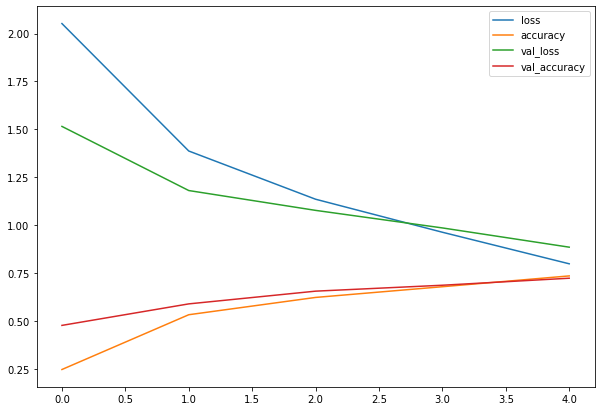

In [354]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [355]:
model_1.evaluate(test_data)  ## looks like our model gettin % accuracy even in the test set

28/28 [==============================] - 4s 154ms/step - loss: 0.8275 - accuracy: 0.7148


[0.8274968862533569, 0.7147766351699829]

In [356]:
model_1.summary()  

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 10)      100       
                                                                 
 conv2d_41 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 conv2d_43 (Conv2D)          (None, 58, 58, 10)        910       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 29, 29, 10)       0         
 g2D)                                                

## Random Guessing

In [538]:
audioPath = 'C:\\Users\\user\\Desktop\\BootCamp Project\\UrbanSound8K\\audio\\fold1'

filename = random.choice(os.listdir(audioPath))
path = os.path.join(audioPath, filename)
print("Class name is ",df[df["slice_file_name"]==path.split("\\")[-1]]["class"].iloc[0])
print("Class Id is ",df[df["slice_file_name"]==path.split("\\")[-1]]["classID"].iloc[0])
play(path)

Class name is  jackhammer
Class Id is  7


In [539]:
spectogram = create_spectogram(path)
spectogram

array([[220.10056, 221.89725, 224.17757, ..., 204.95663, 204.6796 ,
        214.03146],
       [221.94511, 219.2203 , 222.46321, ..., 232.87863, 229.95169,
        220.3296 ],
       [225.54054, 228.98508, 231.84525, ..., 243.78094, 242.55687,
        230.16551],
       ...,
       [175.     , 175.     , 175.     , ..., 175.     , 175.     ,
        175.     ],
       [175.     , 175.     , 175.     , ..., 175.     , 175.     ,
        175.     ],
       [175.     , 175.     , 175.     , ..., 175.     , 175.     ,
        175.     ]], dtype=float32)

In [540]:
## creating an jpg file first to see

cv.imwrite("example.jpg",spectogram)
img = cv.imread("example.jpg")
img.resize(128,128,1)
img = img/255
img.shape

(128, 128, 1)

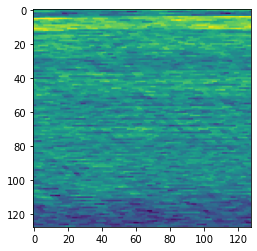

In [541]:
plt.imshow(img)

In [542]:



print("Predicted class  ",num2classes[model_1.predict(tf.expand_dims(img,axis=0)).argmax()]) 
print("True Class  is ",df[df["slice_file_name"]==path.split("\\")[-1]]["class"].iloc[0])

1/1 [==============================] - 0s 21ms/step
Predicted class   jackhammer
True Class  is  jackhammer


### Saving and Loading Model


In [357]:
model_1.save("urban_sound_classifier_model")

INFO:tensorflow:Assets written to: urban_sound_classifier_model\assets


INFO:tensorflow:Assets written to: urban_sound_classifier_model\assets


In [358]:
loaded_model_11 = tf.keras.models.load_model("urban_sound_classifier_model")
loaded_model_11.evaluate(test_data)

28/28 [==============================] - 2s 48ms/step - loss: 0.8275 - accuracy: 0.7148


[0.8274969458580017, 0.7147766351699829]